# ================================
# Building a Robot Judge - Assignment 2
## Matthäus Heer
# ================================

# Import section

In [1]:
%load_ext autoreload
%autoreload 2

import os
import random
from collections import Counter
from pprint import pprint
from textwrap import indent

import spacy
import nltk
from nltk.corpus import stopwords
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import matplotlib 

from context import robot_judge  # Now we can use all the handy robot_judge functionality :-)
from robot_judge.nlp.language_models import spacy_nlp_en, stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matthausheer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/matthausheer/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# How-To

1) In the repo root directory there is a folder called __data__.  
2) Go there and create a folder called __assignment_data__ (or whatever the DATA_DIR_NAME variable below is assigned to).   
3) Place all cases files (*1936_X9VD8L.txt*, ...) in there.  
4) Place the __case_metadata.csv__ file in there.  
5) Technically you could run the code but then you would have to wait for all the spacy processing.  
   So please download the doc_dict.pkl I send u in the email and place it into da __data__ folder as well.  
   Now you are good to go to run everything on a preprocessed 5000 cases corpus.  
6) Run the code below.  

# Process the corpus or load preprocessed corpus
Since processing always takes the longest amount of time, I set up stuff such that I can run spacy once over the corpus and then relaod the processed file later on. If PROCESS==True, the corpus gets sampled, processed and stored for later usage. If instead LOAD==True, we can simply load a preprocessed corpus.

In [2]:
from robot_judge.nlp import robo_spacy

In [3]:
PROCESS         = False             # Load corpus and do full NLP processing
LOAD            = True              # Load already processed pkl file
N_SAMPLED_CASES = 1000              # If PROCESS==True, how many cases should be sampled to work on
DATA_DIR_NAME   = 'assignment_data' # If PROCESS==True, what is the dir dame in data folder to load data from

doc_dict = robo_spacy.preprocess_or_load(PROCESS, LOAD, DATA_DIR_NAME, N_SAMPLED_CASES)

Loading doc dict /Users/matthausheer/university/robo_judge/robot-judge/data/doc_dict.pkl
Method 'load_doc_dict' finished in 54734.18 ms.


# Task 1 
## Reversed prediction

### i) Setup the n-gram sentences
Might run 1min on full corpus.

In [4]:
from robot_judge.nlp import ngrams
from robot_judge.utils.data_structs import flatten_list_of_lists

In [5]:
unigram_sents_dict = ngrams.aggregate_clean_sentences(doc_dict)  # by case
unigram_sents = flatten_list_of_lists(ngrams.get_sents_from_sentence_dict(unigram_sents_dict))  # over all cases

In [6]:
bigram_sents, bigram_sents_dict = ngrams.create_xgram_sentences(unigram_sents, unigram_sents_dict, min_count=2)
trigram_sents, trigram_sents_dict = ngrams.create_xgram_sentences(bigram_sents, bigram_sents_dict, min_count=1)

In [7]:
if False:  # set True to check that everything worked as expected
    ngrams.print_label_sent_dict(trigram_sents_dict)

### ii) Create data frame of features

In [8]:
from robot_judge.io import DataLoader
from robot_judge.nlp import ngrams
from robot_judge.ml import feature_extraction

# Step 1: Filter words such that we use most common bi- and tri-gram words and fill up with most common usual words
filtered_words = ngrams.filter_words(trigram_sents_dict, n_most_common=1000)

In [9]:
# Step 2: Put together the feature matrix and target vector using those filtered words
X, y = feature_extraction.setup_feature_matrix(trigram_sents_dict, filtered_words, DataLoader(), 'case_reversed')

In [10]:
X.head()

,confers_power,77_93,said_term_used,common_scheme,summary_judgment_dismissing,continue_effects,board_fhlbb,qualified_covered_veterans,cease_business,request_sanctions,...,t_111,injury_part_pattern,persons_inside,success_effort,satisfies_requirements,professor_areeda,144_75_l.ed,correctly_applied_law,discharged_position,still_live
2006_X15139I003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1974_X42N97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1929_X3G5P8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1963_X3RLI8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982_X3PC9F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### iii) Split data into train and test set and setup training pipeline

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
pipeline = Pipeline([('std_scaler', StandardScaler()),
                     ('log_regr', LogisticRegression())])

param_grid = {'log_regr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

clf = GridSearchCV(pipeline, param_grid=param_grid, cv=5, refit=True)
clf = clf.fit(X_train, y_train)

In [14]:
y_pred = clf.predict(X_test)  # evaluate on out-of-sample test set

In [15]:
print('Classification report:\n')
print(classification_report(y_test, y_pred))

Classification report:

             precision    recall  f1-score   support

          0       0.49      0.33      0.40       114
          1       0.66      0.78      0.72       186

avg / total       0.59      0.61      0.59       300



### iiii) Evaluation: Confusion matrix, ROC curves, precision-recall, calibration curve

In [16]:
import scikitplot as skplot
from robot_judge.ml import transform_to_text_label

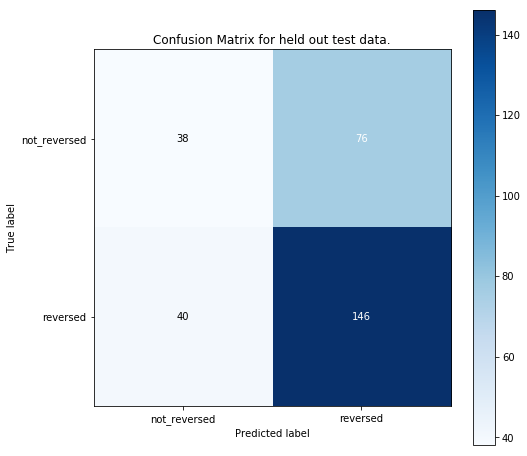

In [17]:
y_true_labels = transform_to_text_label(y_test, 'not_reversed', 'reversed')
y_pred_labels = transform_to_text_label(y_pred, 'not_reversed', 'reversed')

_ = skplot.metrics.plot_confusion_matrix(y_true_labels, y_pred_labels, figsize=(8, 8), 
                                         title="Confusion Matrix for held out test data.")

For AUC score, see plot.


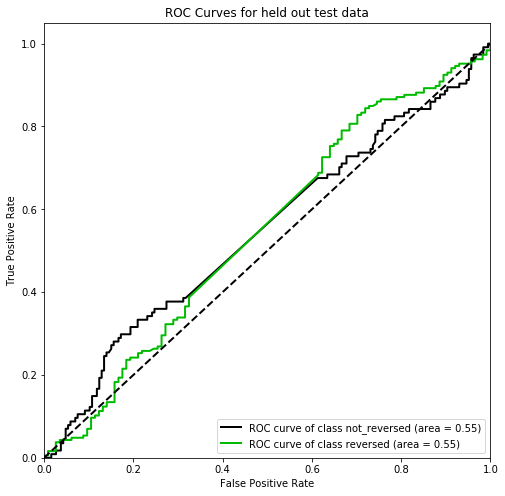

In [18]:
y_proba = clf.predict_proba(X_test)
_ = skplot.metrics.plot_roc(y_true_labels, y_proba, title='ROC Curves for held out test data', figsize=(8, 8), 
             plot_macro=False, plot_micro=False)
print('For AUC score, see plot.')

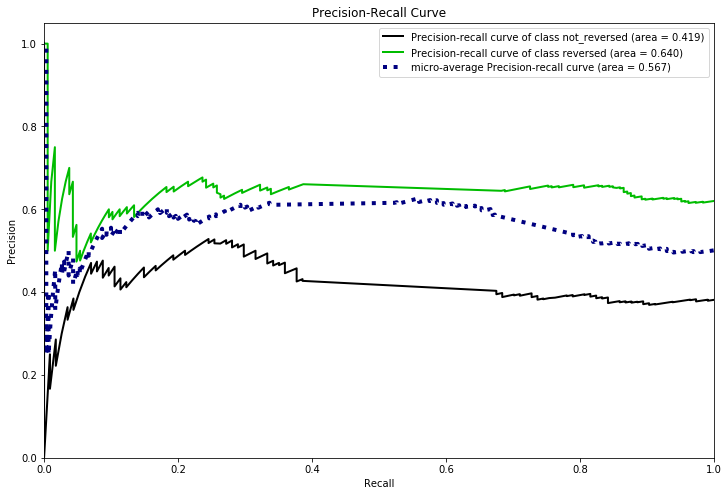

In [19]:
_ = skplot.metrics.plot_precision_recall(y_true_labels, y_proba, figsize=(12, 8))

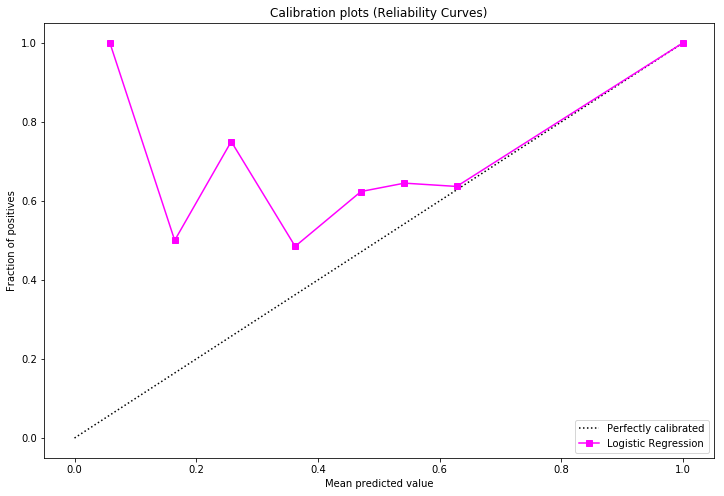

In [20]:
_ = skplot.metrics.plot_calibration_curve(y_true_labels, [y_proba], ['Logistic Regression'], 
                                          figsize=(12, 8), cmap=plt.get_cmap('spring'))

# Task 2
## Predict log cites

### i) setup feature matrix with log cites target vector

In [21]:
filtered_words = ngrams.filter_words(trigram_sents_dict, n_most_common=5000)
X, y = feature_extraction.setup_feature_matrix(trigram_sents_dict, filtered_words, DataLoader(), 'log_cites')

In [22]:
X.head()

,confers_power,77_93,said_term_used,common_scheme,summary_judgment_dismissing,continue_effects,board_fhlbb,qualified_covered_veterans,cease_business,request_sanctions,...,intestate_estate,quota_price,clearly_articulated,158_59,f.2d_228,negligence_officers,stiffel_pole,enhanced_damages_opinion,u.s._924,booster_lodge
2006_X15139I003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1974_X42N97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1929_X3G5P8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1963_X3RLI8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982_X3PC9F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ii) setup pipeline and train / evaluate as in task 1

In [23]:
from sklearn.linear_model import ElasticNet, Ridge
import numpy as np

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline = Pipeline([('std_scaler', StandardScaler()),
                     ('estimator', Ridge())])

param_grid = {'estimator__alpha': [0.001, 0.01, 0.1, 0, 1, 10, 100]}

clf = GridSearchCV(pipeline, param_grid=param_grid, cv=5, refit=True)
clf = clf.fit(X_train, y_train)

/Users/matthausheer/.pyenv/versions/skills_ml_env/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/matthausheer/.pyenv/versions/skills_ml_env/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Users/matthausheer/.pyenv/versions/skills_ml_env/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/matthausheer/.pyenv/versions/skills_ml_env/lib/python3.6/site-packages/sklearn/linear

In [25]:
y_pred = clf.predict(X_test)

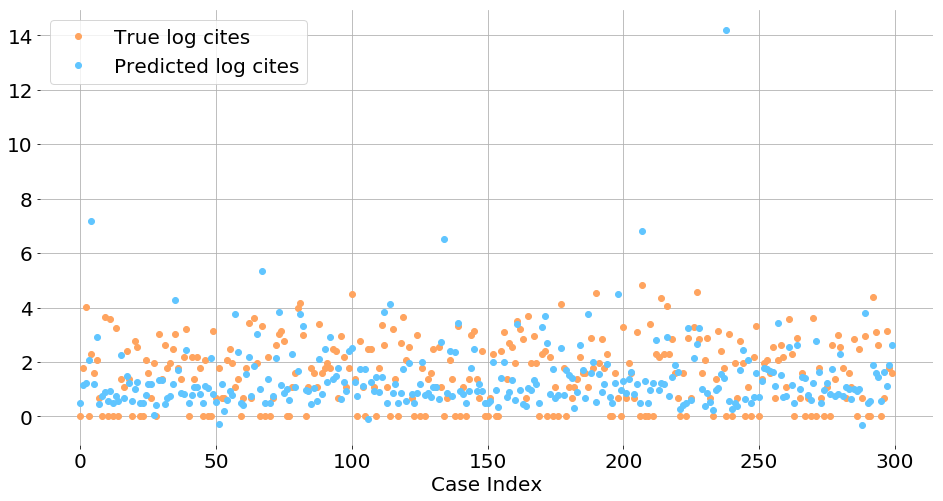

In [26]:
from robot_judge.utils import viz_utils

fig, ax = viz_utils.setup_figure_1ax('Case Index', size=(20, 8))

x = range(len(y_test.index))
ax.plot(x, y_test, 'o', c='#ffa45f', label='True log cites')
ax.plot(x, y_pred, 'o', c='#60c5ff', label='Predicted log cites')
_ = ax.legend()

Well although I think the classifier does a pretty bad job, at least the range in which the predicted values fall is correct.

# Task 3
## Average citations for judges

In [27]:
data_loader = DataLoader()
meta_df = data_loader.get_target_values_df()

In [29]:
meta_df = meta_df.dropna()

In [30]:
meta_df.head()

,case_reversed,judge_id,year,log_cites
caseid,,,,
X3JGGO,0,1653.0,1925.0,1.098612
X3OH3J,0,1034.0,1924.0,1.609438
X3U0KO,0,2303.0,1925.0,1.791759
X3JGJV,0,485.0,1925.0,2.708050
X2S1PK,0,1113.0,1924.0,1.386294


In [31]:
#meta_df.plot( x='judge_id', y='log_cites', kind='bar')
judge_ids = meta_df['judge_id']
log_cites = meta_df['log_cites']

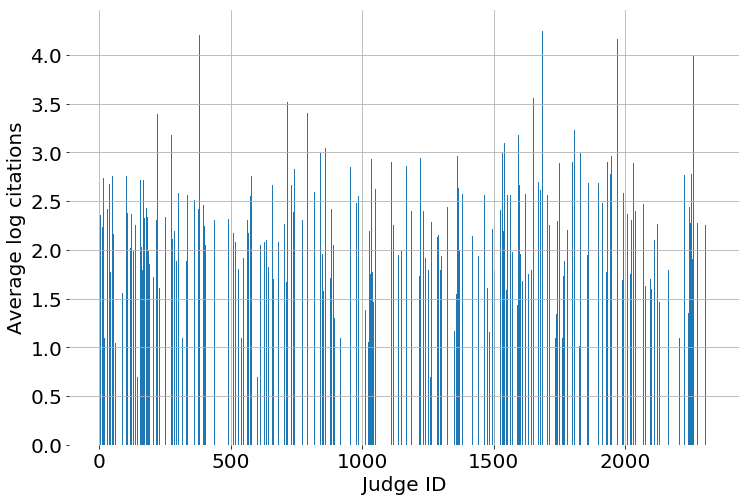

In [32]:
meta_df = meta_df.groupby('judge_id').mean().reset_index()

fig, ax = viz_utils.setup_figure_1ax(x_label='Judge ID', y_label='Average log citations', size=(15, 8))
_ = ax.bar(meta_df['judge_id'], meta_df['log_cites'], width=1.2)

# Task 4
## LDA topic word clouds

In [33]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

import matplotlib.pyplot as plt

from robot_judge.exploration import robo_word_cloud
from robot_judge.utils.data_structs import flatten_list_of_lists

## Step 1 - Why not make a wordcloud over all trigram phrases in all 5000 cases?

In [34]:
all_words = flatten_list_of_lists(trigram_sents)

In [35]:
from collections import Counter
from robot_judge.utils.data_structs import get_most_n_most_common_counter_entries

word_counter = Counter(all_words)
most_common_words = get_most_n_most_common_counter_entries(word_counter, 1000)

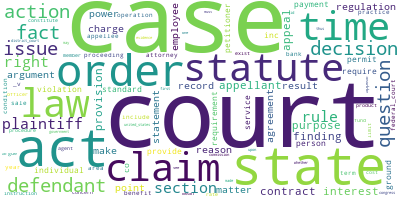

In [36]:
word_cloud = robo_word_cloud.list_of_words_to_point_cloud(most_common_words, max_words=100)
word_cloud.to_image()

## Step 2 - Topic modeling

In [37]:
from robot_judge.ml import topic_model

In [38]:
N_TOPICS = 3
lda, count_vectorizer, count_data = topic_model.train_lda(most_common_words, N_TOPICS)
topic_model.print_topics(lda, count_vectorizer, N_TOPICS)

Printing 3 top words for all topics.

 --- Topic 0 ---
_v owner mean

 --- Topic 1 ---
rates attorneys in_fact

 --- Topic 2 ---
unlawful located recovery


In [39]:
word_cloud_imgs = []
for topic in lda.components_:
    topic_words = [most_common_words[i] for i in topic.argsort()]
    word_cloud = robo_word_cloud.list_of_words_to_point_cloud(topic_words, max_words=100)
    word_cloud_imgs.append(word_cloud.to_image())

Topic 0


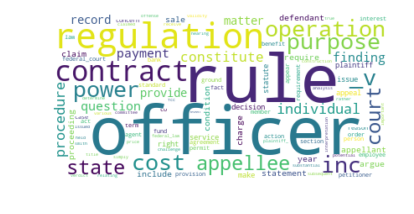

Topic 1


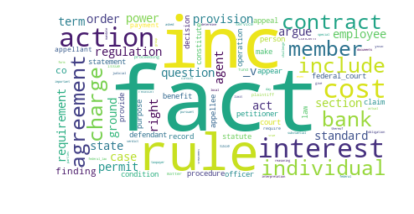

Topic 2


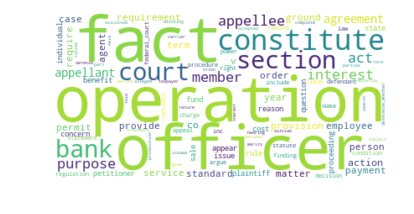

In [40]:
for topic_idx, topic_word_cloud in enumerate(word_cloud_imgs):
    print(f'Topic {topic_idx}')
    img = topic_word_cloud
    plt.figure()
    plt.imshow(img, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    

## Step 3 - Visualize topics

In [41]:
import pickle

from common import DATA_DIR_PATH

from pyLDAvis import sklearn as sklearn_lda
import pyLDAvis

In [42]:
lda_vis_file_path = os.path.join(DATA_DIR_PATH, 'ldavis_prepared_'+str(N_TOPICS))

LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(N_TOPICS) +'.html')

print('Now you can inspect the ./ldavis_prepared_....html')

/Users/matthausheer/.pyenv/versions/skills_ml_env/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Now you can inspect the ./ldavis_prepared_....html


# Task 4
## Regression using Tensorflow

In [43]:
import tensorflow as tf
from tensorflow import keras

/Users/matthausheer/.pyenv/versions/skills_ml_env/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/matthausheer/.pyenv/versions/skills_ml_env/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


In [44]:
model = keras.Sequential([
    keras.layers.Dense(20, activation=tf.nn.relu),
    
    keras.layers.Dense(100, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.3, noise_shape=None, seed=None),
    
    keras.layers.Dense(100, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.3, noise_shape=None, seed=None),

    keras.layers.Dense(3, activation=tf.nn.softmax)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(optimizer=optimizer, 
              loss='mean_squared_error')

In [45]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train.as_matrix(), y_train.as_matrix(), epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

/Users/matthausheer/.pyenv/versions/skills_ml_env/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.



........................

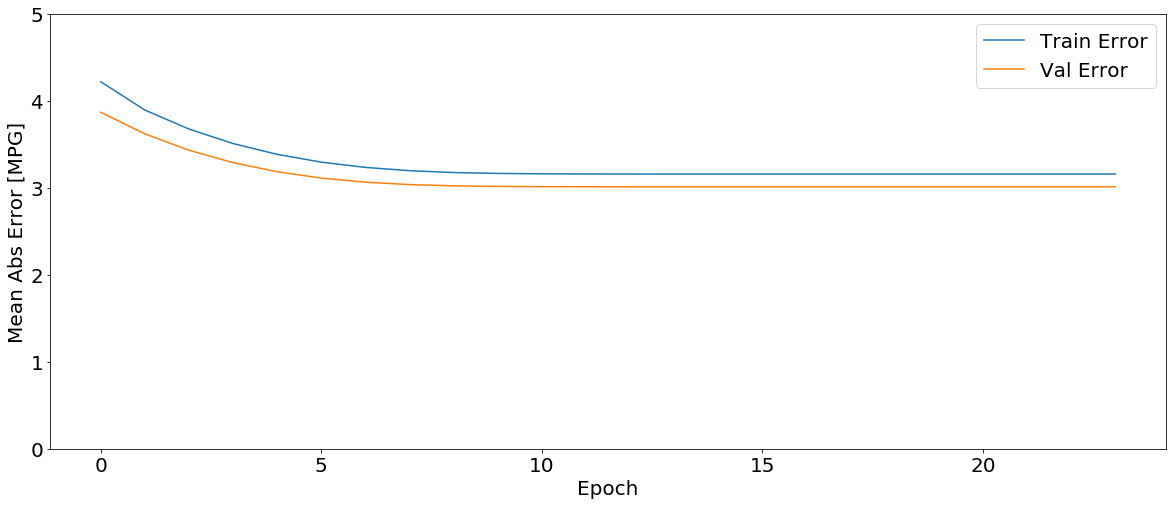

In [46]:
def plot_history(history):
    df = pd.DataFrame(history.history)
    df['epoch'] = history.epoch

    plt.figure(figsize=(20, 8))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(df['epoch'], df['loss'], label='Train Error')
    plt.plot(df['epoch'], df['val_loss'], label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()
    plt.show()


plot_history(history)